In [1]:
# 1.Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/synthetic/attention_platform_monthly.csv")

In [2]:
# 2.Revenue Dependency Factor
df["revenue_dependency_factor"] = (
    df["ads_per_hour"] / (df["ads_per_hour"] + 5)
)

In [3]:
# 3.Monetization Sensitivity Score
df["monetization_sensitivity_score"] = (
    df["revenue_dependency_factor"] *
    (1 - df["monthly_retention_rate"])
)

In [4]:
# 4.Platform-Level Monetization Risk
monetization_risk = (
    df.groupby("platform")["monetization_sensitivity_score"]
      .mean()
      .sort_values(ascending=False)
)

monetization_risk

platform
Instagram      0.138175
YouTube        0.130818
Google News    0.126645
Netflix        0.113074
Spotify        0.095479
Coursera       0.085740
Name: monetization_sensitivity_score, dtype: float64

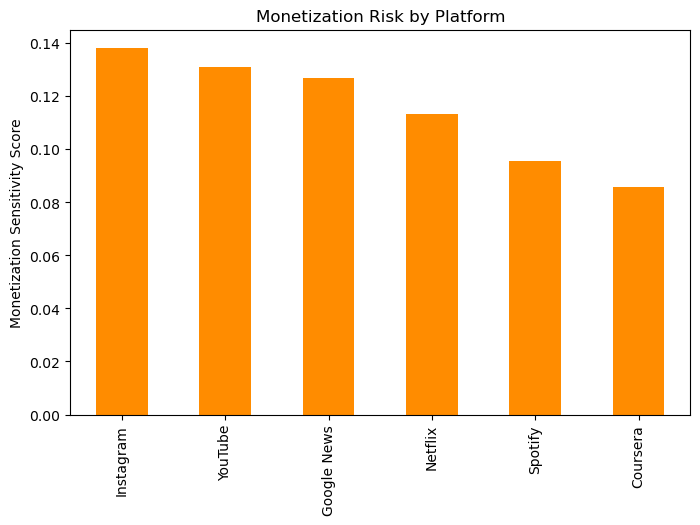

In [5]:
# 5.Visualization — Monetization Risk Ranking
plt.figure(figsize=(8,5))
monetization_risk.plot(kind="bar", color="darkorange")
plt.title("Monetization Risk by Platform")
plt.ylabel("Monetization Sensitivity Score")
plt.xlabel("")
plt.show()

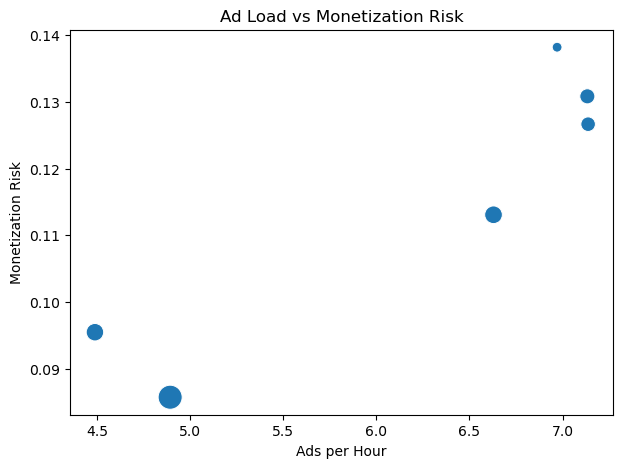

In [6]:
# 6.Fatigue vs Monetization Risk (CRITICAL INSIGHT)
platform_summary = df.groupby("platform").agg({
    "monetization_sensitivity_score": "mean",
    "ads_per_hour": "mean",
    "monthly_retention_rate": "mean"
}).reset_index()

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=platform_summary,
    x="ads_per_hour",
    y="monetization_sensitivity_score",
    size="monthly_retention_rate",
    sizes=(50, 300),
    legend=False
)
plt.title("Ad Load vs Monetization Risk")
plt.xlabel("Ads per Hour")
plt.ylabel("Monetization Risk")
plt.show()

In [7]:
# 7.Scenario Analysis (WHAT IF?)
# Scenario: 10% Attention Drop
df["retention_after_drop"] = df["monthly_retention_rate"] * 0.95

df["risk_after_attention_drop"] = (
    df["revenue_dependency_factor"] *
    (1 - df["retention_after_drop"])
)

scenario_risk = (
    df.groupby("platform")["risk_after_attention_drop"]
      .mean()
      .sort_values(ascending=False)
)

scenario_risk

platform
Instagram      0.158640
YouTube        0.151953
Google News    0.147991
Netflix        0.133851
Spotify        0.112284
Coursera       0.104129
Name: risk_after_attention_drop, dtype: float64

# Markdown Insights 

Sample Insights

Ad-dependent platforms show high monetization sensitivity

Retention buffers revenue loss better than raw attention

Fatigue amplifies monetization risk over time

Reducing ad load can lower long-term revenue risk

✅ Phase 5 Completion Checklist

✔ Monetization risk modeled
✔ Platform ranking created
✔ Scenario analysis completed
✔ Business insights written